In [13]:
from Bio import AlignIO


aln = 'Desktop/SEED.ann'

align = AlignIO.read(aln, "stockholm")


In [46]:
print( align )


Alignment with 63 rows and 722 columns
SNGLVLAALARRGRR--GHWAPI--HVFIGHLCLADLAVAL---...WIY V2R_HUMAN/54-325
GNIMVVLVVMR-TKH--MRT-PT--NCYLVSLAVADLMVL----...VIY TRFR_HUMAN/42-320
GNTVTAFTLAR-KKS--LQSLQSTVHYHLGSLALSDLLTLL---...ILY NTR1_HUMAN/80-364
NAIVLITQLLT-NRV--LGYSTP--TIYMTNLYSTNFLTL----...ILY UL33_HCMVM/50-306
GNFLVVWVTGF-EVR---RT-IN--AIWFLNLAVADLLSC----...IIY C5AR1_CANLF/55-302
ENVLVICVNCR-RSG--RVG-ML--NLYILNMAVADLGII----...ILY GP182_RAT/66-316
ANSVVVWVNIQ-AKT--TGY-DT--HCYILNLAIADLWVV----...VLY ACKR3_CANLF/61-315
GNSLVMLVILY-SRV--GRS-VT--DVYLLNLALADLLFA----...IIY CXCR1_HUMAN/56-305
GNSTVVAIYAY-YKK--RRT-KT--DVYILNLAVADLFLL----...VLY ACKR4_BOVIN/58-303
GNGLVVLTYIY-FKR--LKT-MT--DTYLLNLAVADILFL----...FLY CCR7_HUMAN/75-326
GNGLVILVMGY-QKK--LRS-MT--DKYRLHLSVADLLFV----...ILY CXCR4_BOVIN/56-303
GNVLVLVILER-HRQ--TRS-ST--ETFLFHLAVADLLLV----...MLY CXCR5_HUMAN/68-322
GNLLVVLALTN-SRK--SKS-IT--DIYLLNLALSDLLFV----...FIY CX3C1_RAT/49-294
GNFLVIFTITW-RRR--IQC-SG--DVYFINLAAADLLFV----...LLY US28_HCMVM

In [47]:
print(len(align))

63


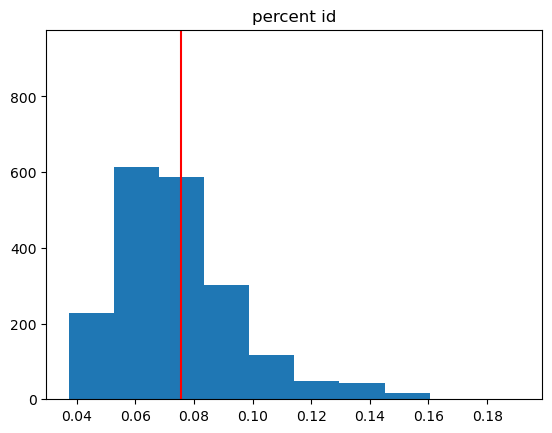

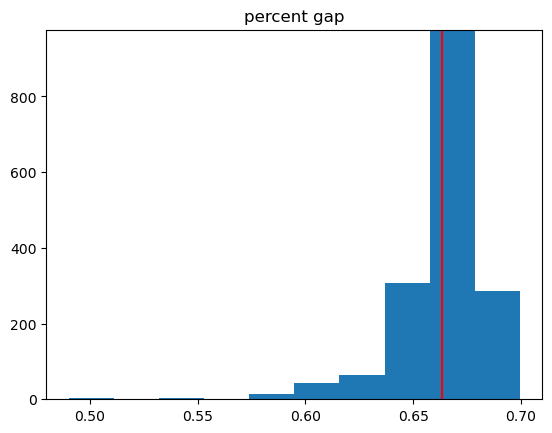

In [53]:
import numpy as np
from scipy.spatial import distance
from matplotlib import pyplot as plt
distances = []
percent_gaps = []

for i,seq1 in enumerate(align):
    for j,seq2 in enumerate(align):
        if i < j:
            str1 = np.array(list(seq1.seq))
            str2 = np.array(list(seq2.seq))            
            percent_ident = len(np.where( (str1 == str2 ) & (str1 != '-' ) & (str2 != '-')  )[0]) / len(str1)
            percent_gap = len(np.where( (str1 == '-' ) | (str2 == '-')  & ( str1 != str2 )  )[0]) / len(str1)
            percent_gaps.append(percent_gap)
            distances.append(percent_ident)


plt.title('percent id')            
plt.ylim( 0, len(distances) / 2)
plt.hist(distances)
plt.vlines(np.mean(distances) , 0, len(distances) / 2 , 'r')
plt.show()


plt.title('percent gap')
plt.ylim( 0, len(percent_gaps) / 2)
plt.hist(percent_gaps)
plt.vlines(np.mean(percent_gaps) , 0, len(percent_gaps) / 2 , 'r')
plt.show()